/Users/michael/PycharmProjects/ModelCalibrationDeepLearning/venev/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Model loaded from ../models/model_set_60.pth


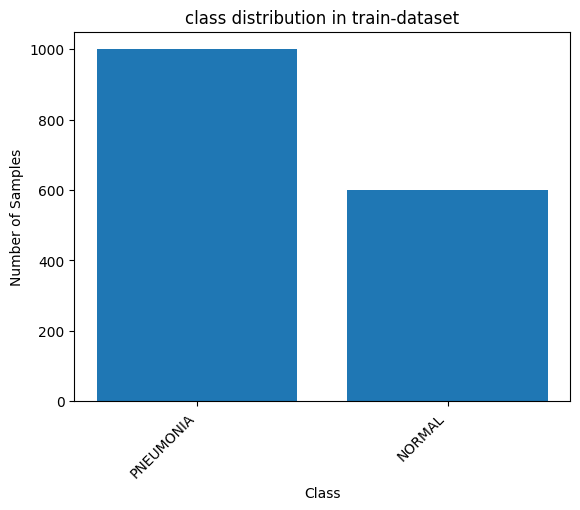

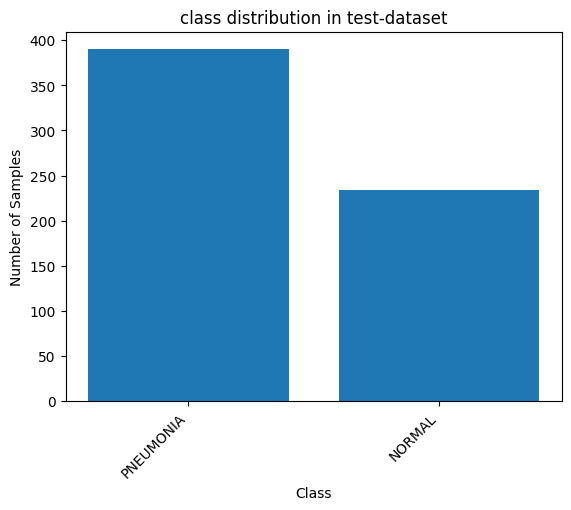

In [1]:
from plot_utils import plot_histogram_balance_of_dataset, plot_roc_curve, plot_probability_histogram, \
    plot_confusion_matrix
from model import Model
from plot_utils import plot_pr_curve

train_data_dir = "../data/train_data_chest_xray_set_60"
test_data_dir = "../data/chest_xray/test"
train_val_split_ratio = 0.8

model = Model(train_dir=train_data_dir,
              test_dir=test_data_dir,
              train_val_split_ratio=train_val_split_ratio)
model.load_existing_model("../models/model_set_60.pth")
plot_histogram_balance_of_dataset(train_data_dir, "class distribution in train-dataset")
plot_histogram_balance_of_dataset(test_data_dir, "class distribution in test-dataset")

In [11]:
true_labels_val, predicted_labels_val, confidence_all_classes_val, _ = model.evaluate(model.val_loader)
true_labels, predicted_labels_baseline, confidence_baseline, _ = model.evaluate()

## Baseline


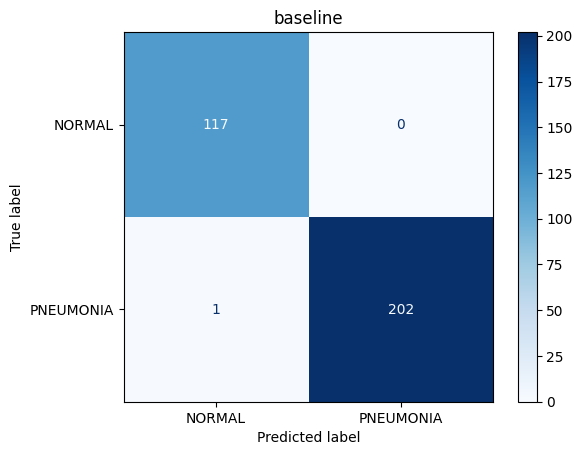

F1-score: 0.9975308641975309
Precision: 1.0
Recall: 0.9950738916256158
Accuracy: 0.996875


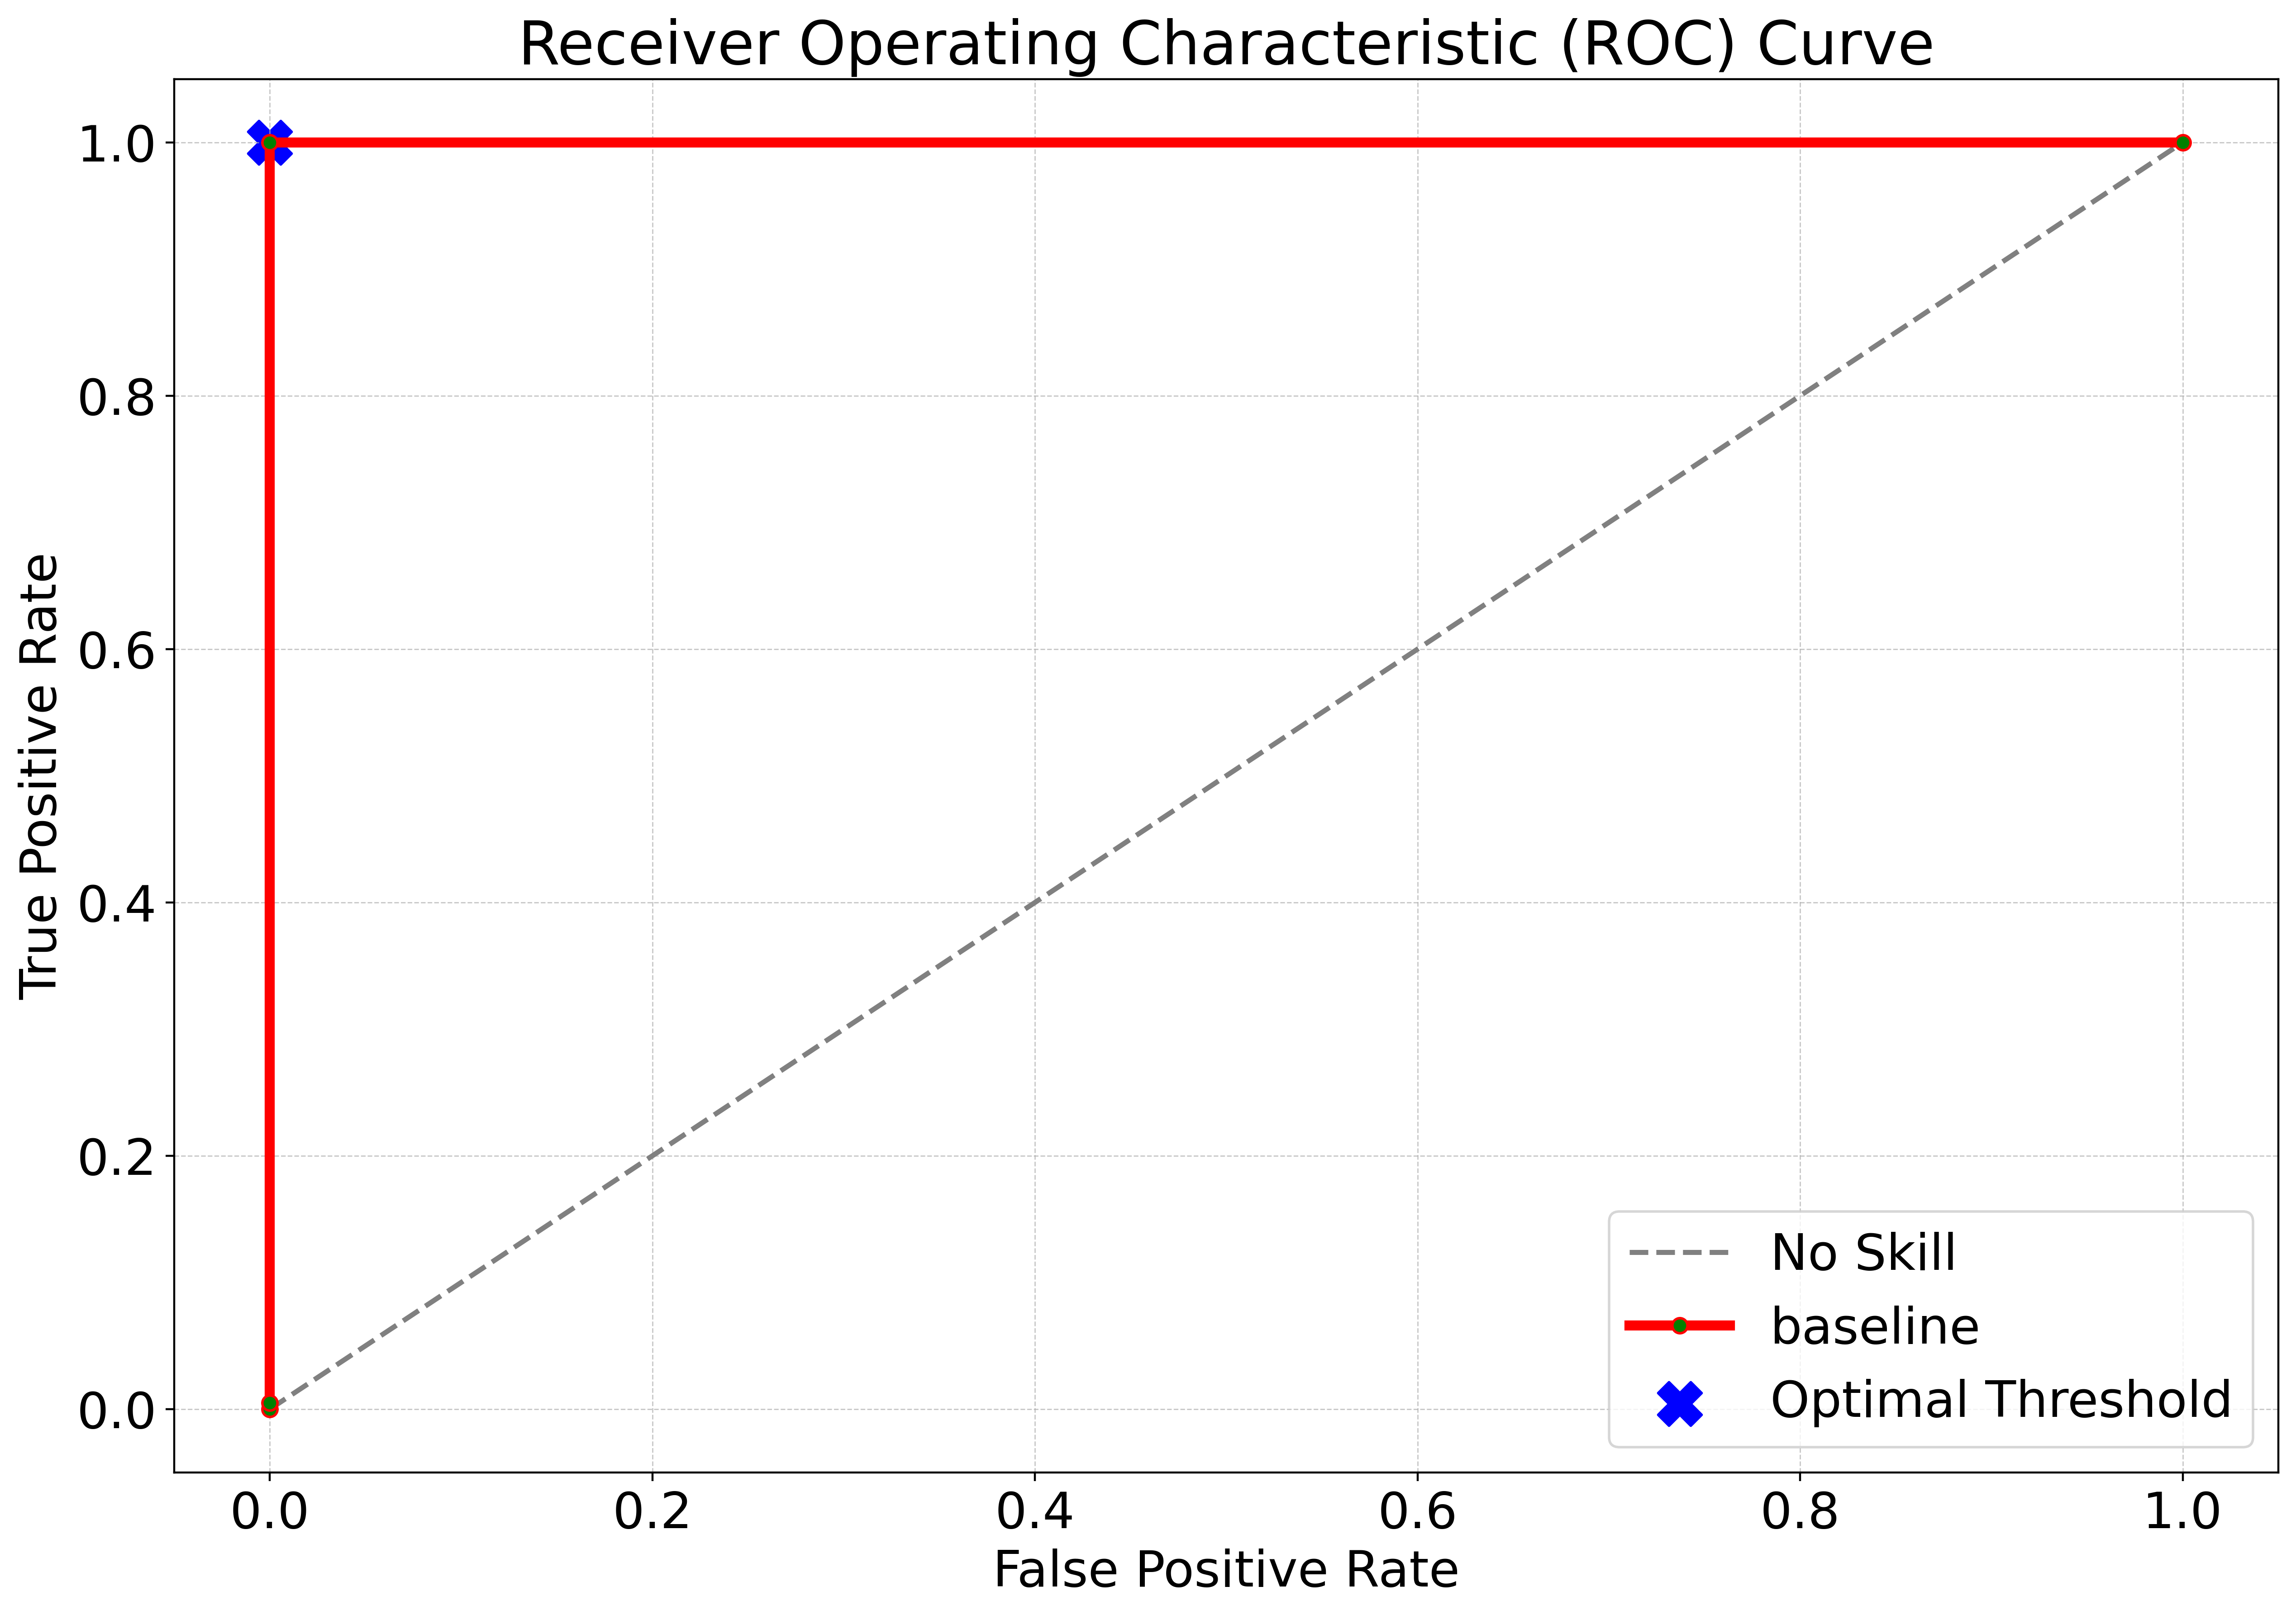

ROC AUC Score: 1.0


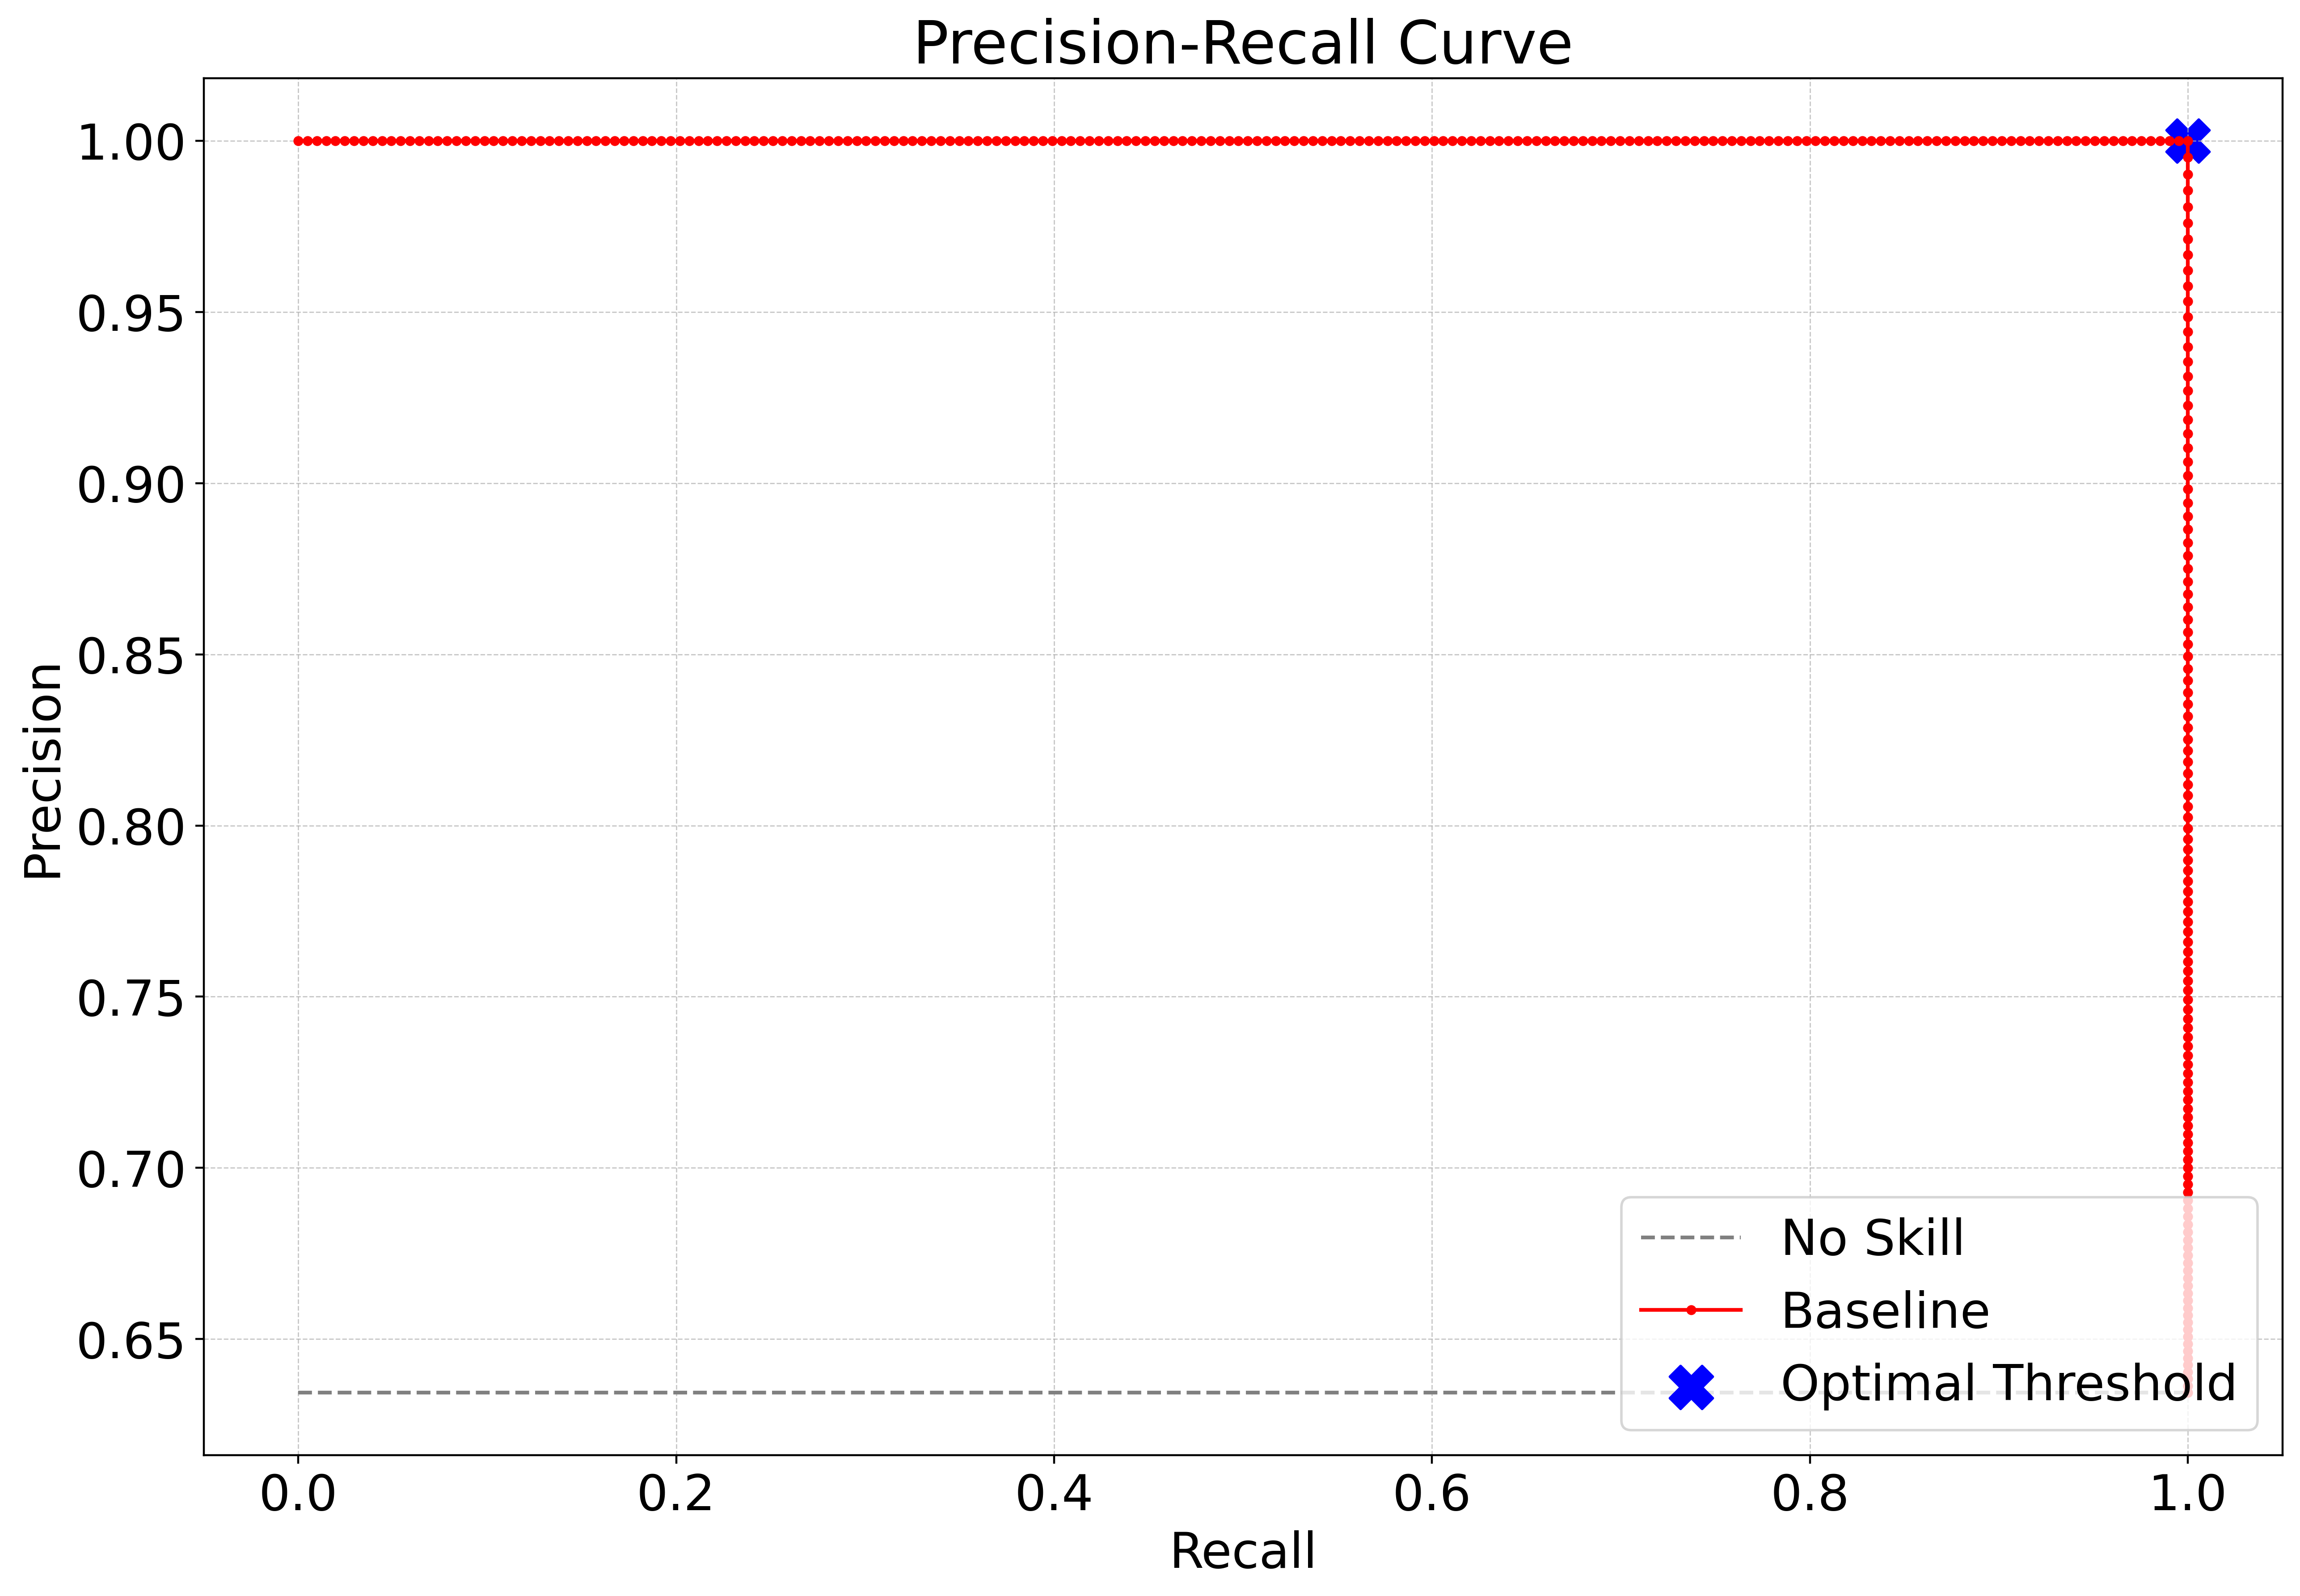

PR AUC Score: 1.0
Best F1 Score: 1.0
Threshold with best f1: 0.45761945843696594


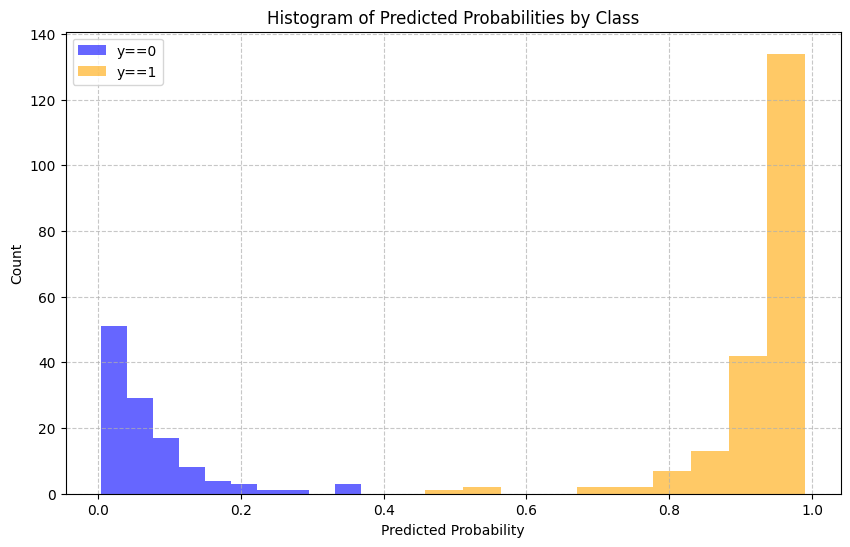

ECE: 0.06976750179310329
MCE: 0.5423805415630341


In [15]:
f1_baseline, precision_baseline, recall_baseline, accuracy_baseline = plot_confusion_matrix(true_labels,
                                                                                            predicted_labels_baseline,
                                                                                            "baseline")

print(f"F1-score: {f1_baseline}")
print(f"Precision: {precision_baseline}")
print(f"Recall: {recall_baseline}")
print(f"Accuracy: {accuracy_baseline}")

roc_auc_score_baseline = plot_roc_curve(true_labels, confidence_baseline[:, 1], "baseline")
print(f"ROC AUC Score: {roc_auc_score_baseline}")

best_threshold_f1_baseline, best_f1_baseline, pr_auc_baseline = plot_pr_curve(true_labels, confidence_baseline[:, 1],
                                                                              "Baseline")
print(f"PR AUC Score: {pr_auc_baseline}")
print(f"Best F1 Score: {best_f1_baseline}")
print(f"Threshold with best f1: {best_threshold_f1_baseline}")

ece_baseline, mce_baseline = plot_probability_histogram(true_labels, confidence_baseline[:, 1])
print(f"ECE: {ece_baseline}")
print(f"MCE: {mce_baseline}")

## Platt Scaling

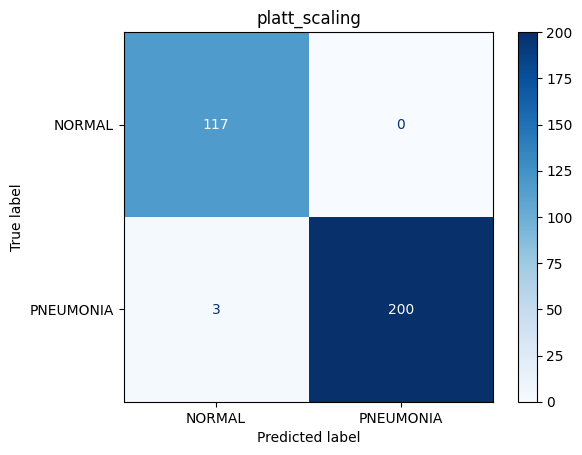

F1-score: 0.9925558312655087
Precision: 1.0
Recall: 0.9852216748768473
Accuracy: 0.990625


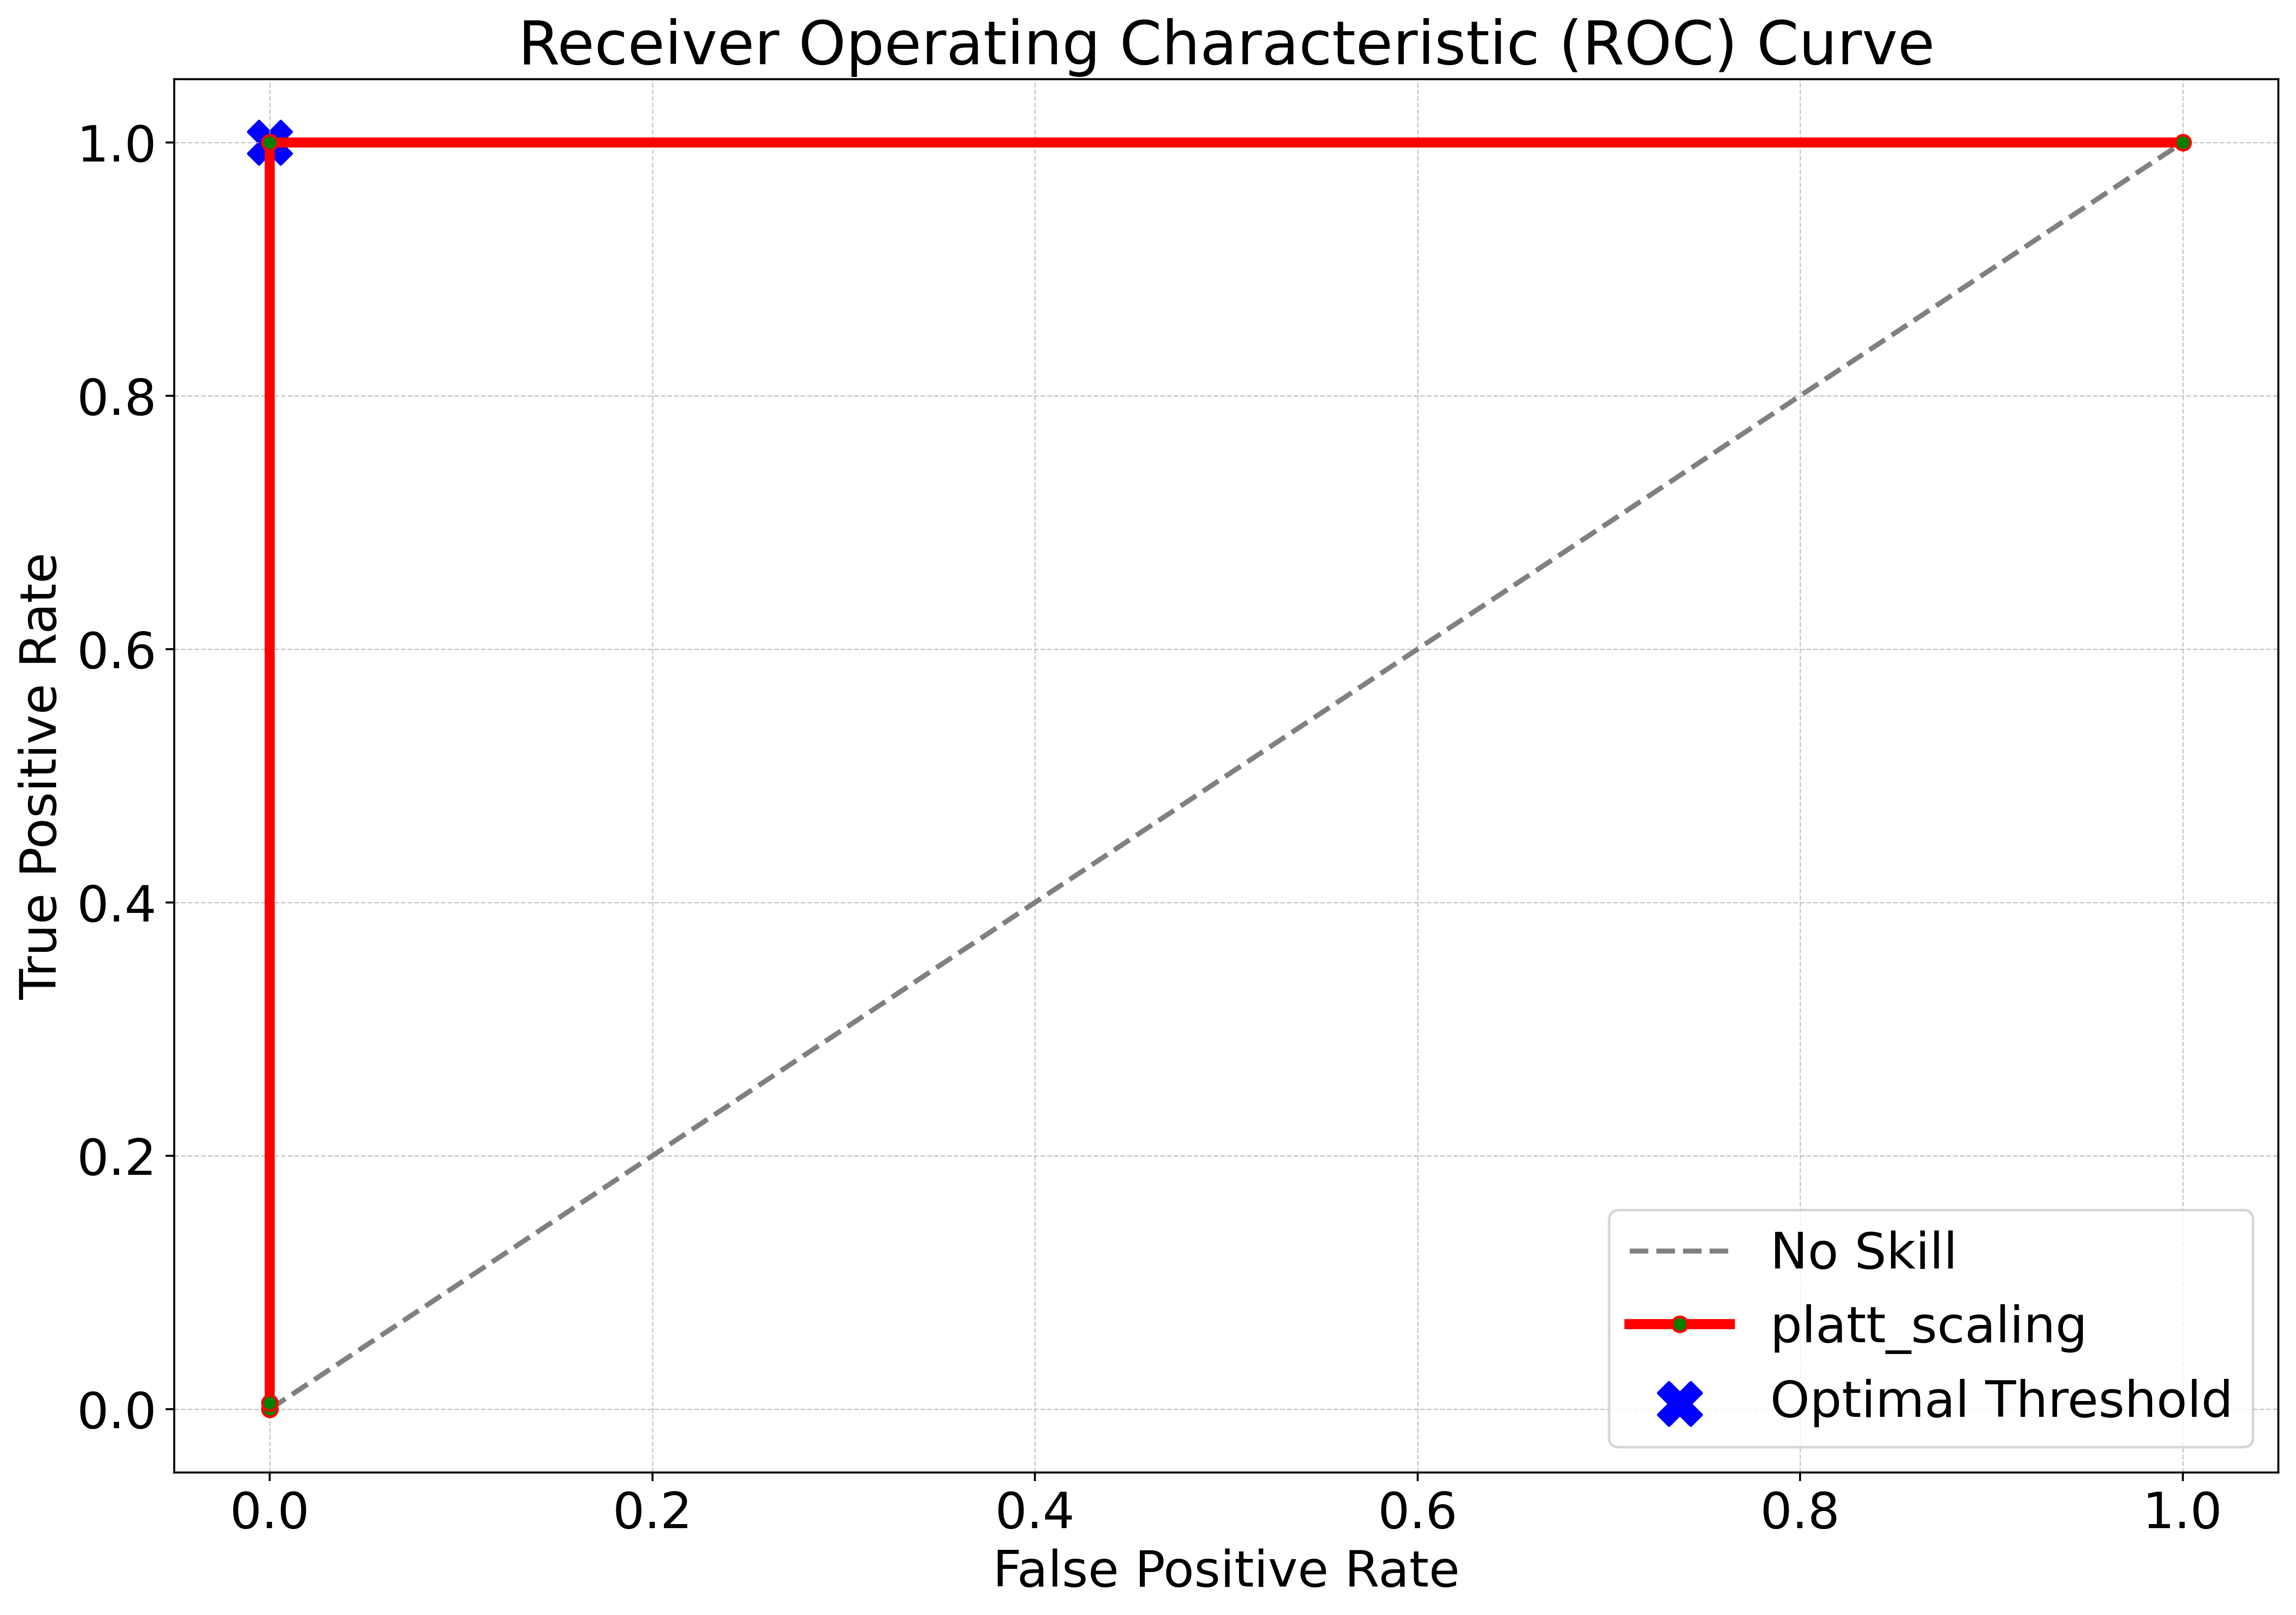

ROC AUC Score: 1.0


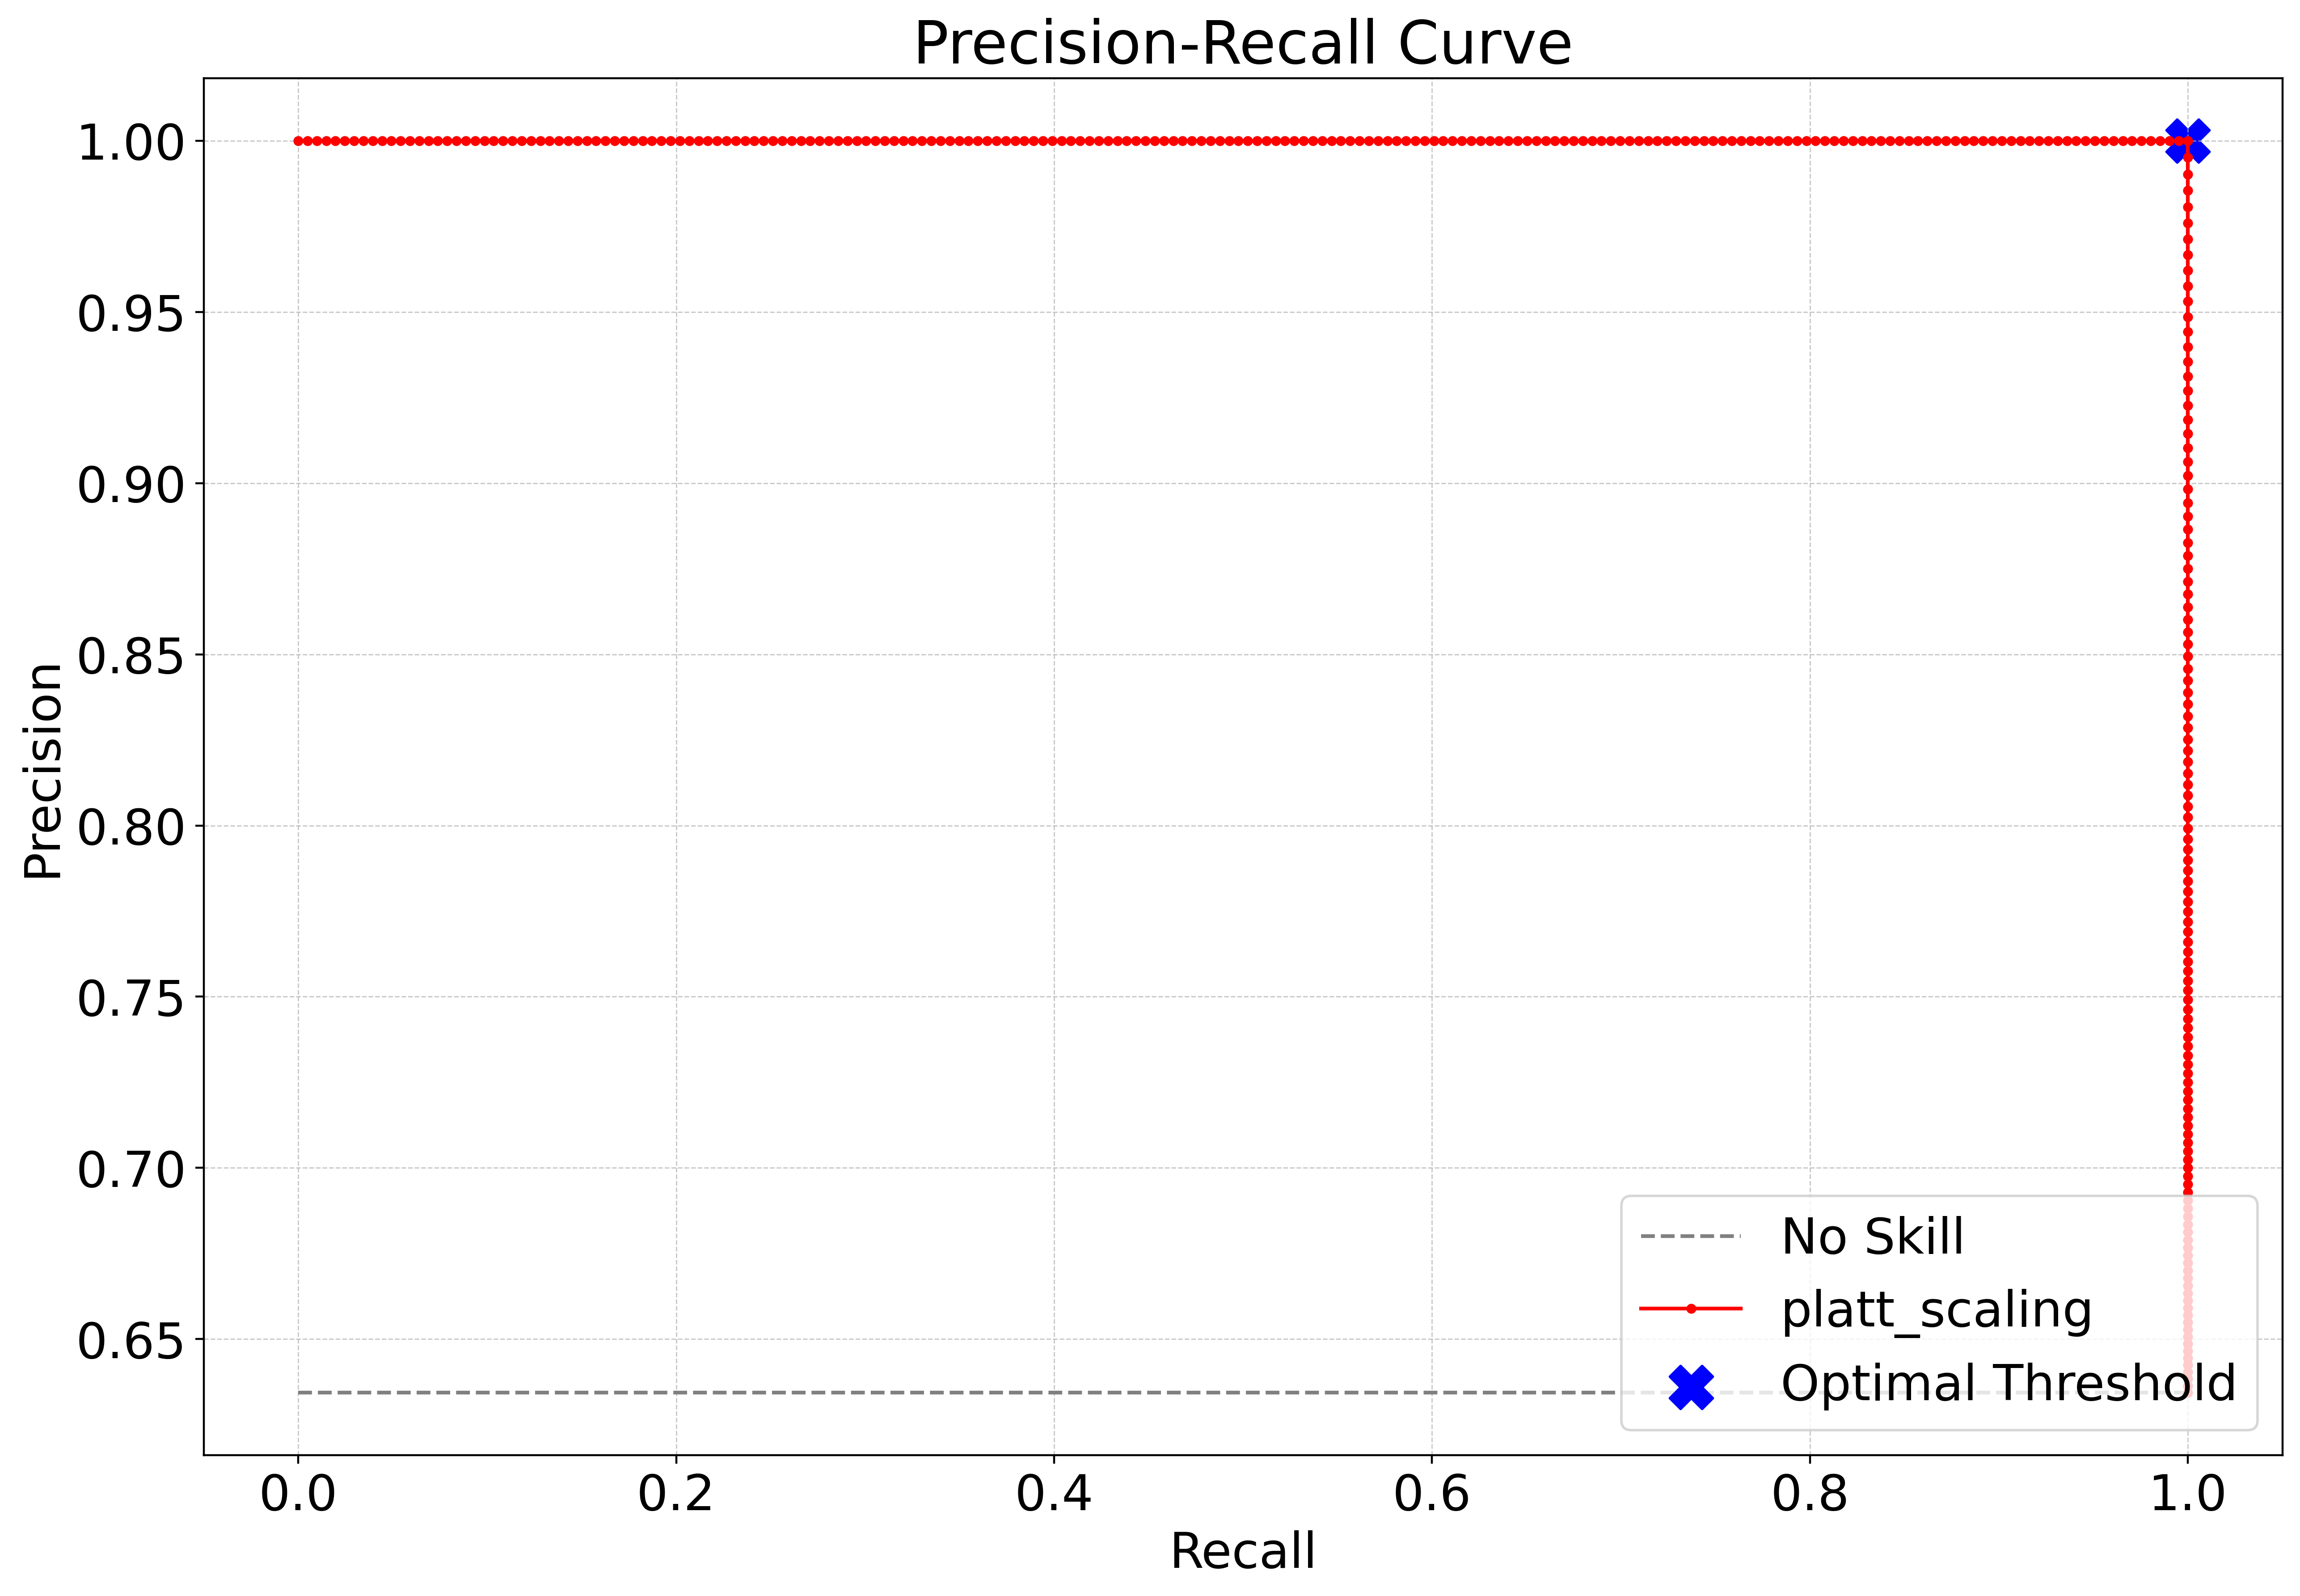

PR AUC Score: 1.0
Best F1 Score: 1.0
Threshold with best f1: 0.21521015822125228


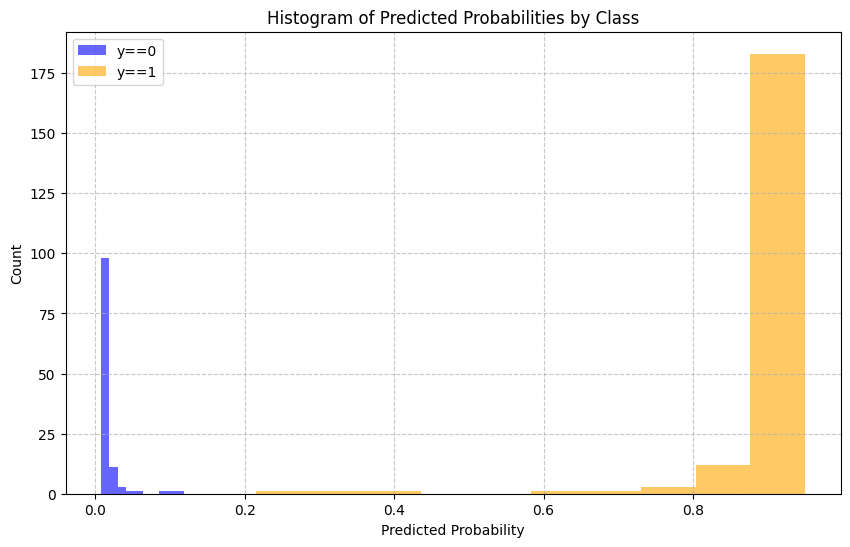

ECE: 0.06166321223859683
MCE: 0.7847898417787478


In [13]:
model.optimize_platt_scaling(true_labels_val, confidence_all_classes_val[:, 1], 1)
predicted_labels_platt_scaling, confidence_platt_scaling = model.evaluate_with_platt_scaling(confidence_baseline[:, 1])

f1_platt_scaling, precision_platt_scaling, recall_platt_scaling, accuracy_platt_scaling = plot_confusion_matrix(
    true_labels, predicted_labels_platt_scaling, "platt_scaling")

print(f"F1-score: {f1_platt_scaling}")
print(f"Precision: {precision_platt_scaling}")
print(f"Recall: {recall_platt_scaling}")
print(f"Accuracy: {accuracy_platt_scaling}")

roc_auc_score_platt_scaling = plot_roc_curve(true_labels, confidence_platt_scaling[:, 1], "platt_scaling")
print(f"ROC AUC Score: {roc_auc_score_platt_scaling}")

best_threshold_f1_platt_scaling, best_f1_platt_scaling, pr_auc_platt_scaling = plot_pr_curve(true_labels,
                                                                                             confidence_platt_scaling[:,
                                                                                             1], "platt_scaling")
print(f"PR AUC Score: {pr_auc_platt_scaling}")
print(f"Best F1 Score: {best_f1_platt_scaling}")
print(f"Threshold with best f1: {best_threshold_f1_platt_scaling}")

ece_platt_scaling, mce_platt_scaling = plot_probability_histogram(true_labels, confidence_platt_scaling[:, 1])
print(f"ECE: {ece_platt_scaling}")
print(f"MCE: {mce_platt_scaling}")

## Beta-Calibration

In [ ]:
model.optimize_beta_calibration(true_labels_val, confidence_all_classes_val[:, 1])
predicted_labels_beta_calibration, confidence_beta_calibration = model.evaluate_with_beta_calibration(
    confidence_baseline[:, 1])

f1_beta_calibration, precision_beta_calibration, recall_beta_calibration, accuracy_beta_calibration = plot_confusion_matrix(
    true_labels, predicted_labels_beta_calibration, "beta_calibration")

print(f"F1-score: {f1_beta_calibration}")
print(f"Precision: {precision_beta_calibration}")
print(f"Recall: {recall_beta_calibration}")
print(f"Accuracy: {accuracy_beta_calibration}")

roc_auc_score_beta_calibration = plot_roc_curve(true_labels, confidence_beta_calibration[:, 1], "beta_calibration")
print(f"ROC AUC Score: {roc_auc_score_beta_calibration}")

best_threshold_f1_beta_calibration, best_f1_beta_calibration, pr_auc_beta_calibration = plot_pr_curve(true_labels,
                                                                                                      confidence_beta_calibration[
                                                                                                      :, 1],
                                                                                                      "beta_calibration")
print(f"PR AUC Score: {pr_auc_beta_calibration}")
print(f"Best F1 Score: {best_f1_beta_calibration}")
print(f"Threshold with best f1: {best_threshold_f1_beta_calibration}")

ece_beta_calibration, mce_beta_calibration = plot_probability_histogram(true_labels, confidence_beta_calibration[:, 1])
print(f"ECE: {ece_beta_calibration}")
print(f"MCE: {mce_beta_calibration}")

## Spline Calibration

In [ ]:
model.optimize_spline_calibration(true_labels_val, confidence_all_classes_val[:, 1])
predicted_labels_spline_calibration, confidence_spline_calibration = model.evaluate_with_spline_calibration(
    confidence_baseline[:, 1])

f1_spline_calibration, precision_spline_calibration, recall_spline_calibration, accuracy_spline_calibration = plot_confusion_matrix(
    true_labels, predicted_labels_spline_calibration, "spline_calibration")

print(f"F1-score: {f1_spline_calibration}")
print(f"Precision: {precision_spline_calibration}")
print(f"Recall: {recall_spline_calibration}")
print(f"Accuracy: {accuracy_spline_calibration}")

roc_auc_score_spline_calibration = plot_roc_curve(true_labels, confidence_spline_calibration[:, 1],
                                                  "spline_calibration")
print(f"ROC AUC Score: {roc_auc_score_spline_calibration}")

best_threshold_f1_spline_calibration, best_f1_spline_calibration, pr_auc_spline_calibration = plot_pr_curve(true_labels,
                                                                                                            confidence_spline_calibration[
                                                                                                            :, 1],
                                                                                                            "spline_calibration")
print(f"PR AUC Score: {pr_auc_spline_calibration}")
print(f"Best F1 Score: {best_f1_spline_calibration}")
print(f"Threshold with best f1: {best_threshold_f1_spline_calibration}")

ece_spline_calibration, mce_spline_calibration = plot_probability_histogram(true_labels,
                                                                            confidence_spline_calibration[:, 1])
print(f"ECE: {ece_spline_calibration}")
print(f"MCE: {mce_spline_calibration}")

## Isotonic Calibration

In [ ]:
model.optimize_isotonic_calibration(true_labels_val, confidence_all_classes_val[:, 1])
predicted_labels_isotonic_calibration, confidence_isotonic_calibration = model.evaluate_with_isotonic_calibration(
    confidence_baseline[:, 1])

f1_isotonic_calibration, precision_isotonic_calibration, recall_isotonic_calibration, accuracy_isotonic_calibration = plot_confusion_matrix(
    true_labels, predicted_labels_isotonic_calibration, "isotonic_calibration")

print(f"F1-score: {f1_isotonic_calibration}")
print(f"Precision: {precision_isotonic_calibration}")
print(f"Recall: {recall_isotonic_calibration}")
print(f"Accuracy: {accuracy_isotonic_calibration}")

roc_auc_score_isotonic_calibration = plot_roc_curve(true_labels, confidence_isotonic_calibration[:, 1],
                                                    "isotonic_calibration")
print(f"ROC AUC Score: {roc_auc_score_isotonic_calibration}")

best_threshold_f1_isotonic_calibration, best_f1_isotonic_calibration, pr_auc_isotonic_calibration = plot_pr_curve(
    true_labels,
    confidence_isotonic_calibration[
    :, 1],
    "isotonic_calibration")
print(f"PR AUC Score: {pr_auc_isotonic_calibration}")
print(f"Best F1 Score: {best_f1_isotonic_calibration}")
print(f"Threshold with best f1: {best_threshold_f1_isotonic_calibration}")

ece_isotonic_calibration, mce_isotonic_calibration = plot_probability_histogram(true_labels,
                                                                                confidence_isotonic_calibration[:, 1])
print(f"ECE: {ece_isotonic_calibration}")
print(f"MCE: {mce_isotonic_calibration}")

## Temperature Scaling

In [ ]:
model.optimize_temperature(true_labels_val, confidence_all_classes_val[:, 1])
predicted_labels_temperature_scaling, confidence_temperature_scaling = model.evaluate_with_temperature_scaling(
    confidence_baseline[:, 1])

f1_temperature_scaling, precision_temperature_scaling, recall_temperature_scaling, accuracy_temperature_scaling = plot_confusion_matrix(
    true_labels, predicted_labels_temperature_scaling, "temperature_scaling")

print(f"F1-score: {f1_temperature_scaling}")
print(f"Precision: {precision_temperature_scaling}")
print(f"Recall: {recall_temperature_scaling}")
print(f"Accuracy: {accuracy_temperature_scaling}")

roc_auc_score_temperature_scaling = plot_roc_curve(true_labels, confidence_temperature_scaling[:, 1],
                                                   "temperature_scaling")
print(f"ROC AUC Score: {roc_auc_score_temperature_scaling}")

best_threshold_f1_temperature_scaling, best_f1_temperature_scaling, pr_auc_temperature_scaling = plot_pr_curve(
    true_labels,
    confidence_temperature_scaling[
    :, 1],
    "temperature_scaling")
print(f"PR AUC Score: {pr_auc_temperature_scaling}")
print(f"Best F1 Score: {best_f1_temperature_scaling}")
print(f"Threshold with best f1: {best_threshold_f1_temperature_scaling}")

ece_temperature_scaling, mce_temperature_scaling = plot_probability_histogram(true_labels,
                                                                              confidence_temperature_scaling[:, 1])
print(f"ECE: {ece_temperature_scaling}")
print(f"MCE: {mce_temperature_scaling}")

## Histogram Binning

In [ ]:
model.optimize_histogram_binning(true_labels_val, confidence_all_classes_val[:, 1], n_bins=30)
predicted_labels_histogram_binning, confidence_histogram_binning = model.evaluate_with_histogram_binning(
    confidence_baseline[:, 1])

f1_histogram_binning, precision_histogram_binning, recall_histogram_binning, accuracy_histogram_binning = plot_confusion_matrix(
    true_labels, predicted_labels_histogram_binning, "histogram_binning")

print(f"F1-score: {f1_histogram_binning}")
print(f"Precision: {precision_histogram_binning}")
print(f"Recall: {recall_histogram_binning}")
print(f"Accuracy: {accuracy_histogram_binning}")

roc_auc_score_histogram_binning = plot_roc_curve(true_labels, confidence_histogram_binning[:, 1], "histogram_binning")
print(f"ROC AUC Score: {roc_auc_score_histogram_binning}")

best_threshold_f1_histogram_binning, best_f1_histogram_binning, pr_auc_histogram_binning = plot_pr_curve(true_labels,
                                                                                                         confidence_histogram_binning[
                                                                                                         :, 1],
                                                                                                         "histogram_binning")
print(f"PR AUC Score: {pr_auc_histogram_binning}")
print(f"Best F1 Score: {best_f1_histogram_binning}")
print(f"Threshold with best f1: {best_threshold_f1_histogram_binning}")

ece_histogram_binning, mce_histogram_binning = plot_probability_histogram(true_labels,
                                                                          confidence_histogram_binning[:, 1])
print(f"ECE: {ece_histogram_binning}")
print(f"MCE: {mce_histogram_binning}")